### Text Classification using Keras Hub - Expert Level

This notebook demonstrates an expert-level text classification task using the Yelp Polarity Reviews dataset.  
It builds a deep, custom text classification model with advanced layers and bidirectional processing, using Keras.  



In [ ]:
import tensorflow as tf
import keras
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

### Load the Yelp Polarity Reviews dataset  
Downloads and loads the Yelp dataset for binary sentiment classification.  
It includes highly polarized reviews labeled as positive or negative.


In [ ]:
dataset, dataset_info = tfds.load("yelp_polarity_reviews", as_supervised=True, with_info=True)
data_train, data_test = dataset["train"].batch(128), dataset["test"].batch(128)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/yelp_polarity_reviews/incomplete.41OAED_0.2.0/yelp_polarity_reviews-train.…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/yelp_polarity_reviews/incomplete.41OAED_0.2.0/yelp_polarity_reviews-test.t…

Dataset yelp_polarity_reviews downloaded and prepared to /root/tensorflow_datasets/yelp_polarity_reviews/0.2.0. Subsequent calls will reuse this data.


### Load Keras TextVectorization layer  
Prepares the text vectorization layer for converting raw text into numeric sequences.  
Essential for processing textual input into model-readable format.


In [ ]:
text_vectorizer = keras.layers.TextVectorization(max_tokens=30000, output_mode="int", output_sequence_length=300)

In [ ]:
# Prepare text vectorization
text_only_train = data_train.map(lambda x, y: x)
text_vectorizer.adapt(text_only_train)

### Build a deep custom text classification model  
Creates an expert-level model using embedding, bidirectional LSTM, dropout, and dense layers.  
Designed to capture complex text patterns for accurate sentiment classification.


In [ ]:
# Build the model
inputs = keras.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = keras.layers.Embedding(input_dim=30000, output_dim=64)(x)
x = keras.layers.Bidirectional(keras.layers.LSTM(64, return_sequences=True))(x)
x = keras.layers.GlobalMaxPooling1D()(x)
x = keras.layers.Dense(128, activation="relu")(x)
x = keras.layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, x)

# Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

### Display sample dataset entries  
Prints example texts and corresponding labels from the dataset.  
Used to visually confirm that the dataset is correctly loaded and formatted.


In [ ]:
sample_text, sample_label = next(iter(data_train.take(1)))
for i in range(3):  # Show 3 text samples
    print(f"Review {i+1}: {sample_text[i].numpy().decode('utf-8')}")
    print(f"Sentiment: {'Positive' if sample_label[i].numpy() == 1 else 'Negative'}\n")

Review 1: The Groovy P. and I ventured to his old stomping grounds for lunch today.  The '5 and Diner' on 16th St and Colter left me with little to ask for.  Before coming here I had a preconceived notion that 5 & Diners were dirty and nasty. Not the case at all.\n\nWe walk in and let the waitress know we want to sit outside (since it's so nice and they had misters).  We get two different servers bringing us stuff (talk about service) and I ask the one waitress for recommendations.  I didn't listen to her, of course, and ordered the Southwestern Burger w/ coleslaw and started with a nice stack of rings.\n\nThe Onion Rings were perfectly cooked.  They looked like they were prepackaged, but they were very crispy and I could actually bite through the onion without pulling the entire thing out (don't you hate that?!!!)\n\nThe Southwestern Burger was order Medium Rare and was cooked accordingly.  Soft, juicy, and pink with a nice crispy browned outer layer that can only be achieved on a wel

### Train the model  
Trains the custom model on the Yelp dataset and validates on a held-out set.  
Training history is captured for performance visualization.


In [ ]:
history = model.fit(data_train, validation_data=data_test, epochs=4)

Epoch 1/4
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 178s 39ms/step - accuracy: 0.9024 - loss: 0.2248 - val_accuracy: 0.9519 - val_loss: 0.1253
Epoch 2/4
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 168s 38ms/step - accuracy: 0.9573 - loss: 0.1127 - val_accuracy: 0.9546 - val_loss: 0.1199
Epoch 3/4
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 168s 38ms/step - accuracy: 0.9694 - loss: 0.0843 - val_accuracy: 0.9504 - val_loss: 0.1427
Epoch 4/4
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 171s 39ms/step - accuracy: 0.9789 - loss: 0.0615 - val_accuracy: 0.9516 - val_loss: 0.1560


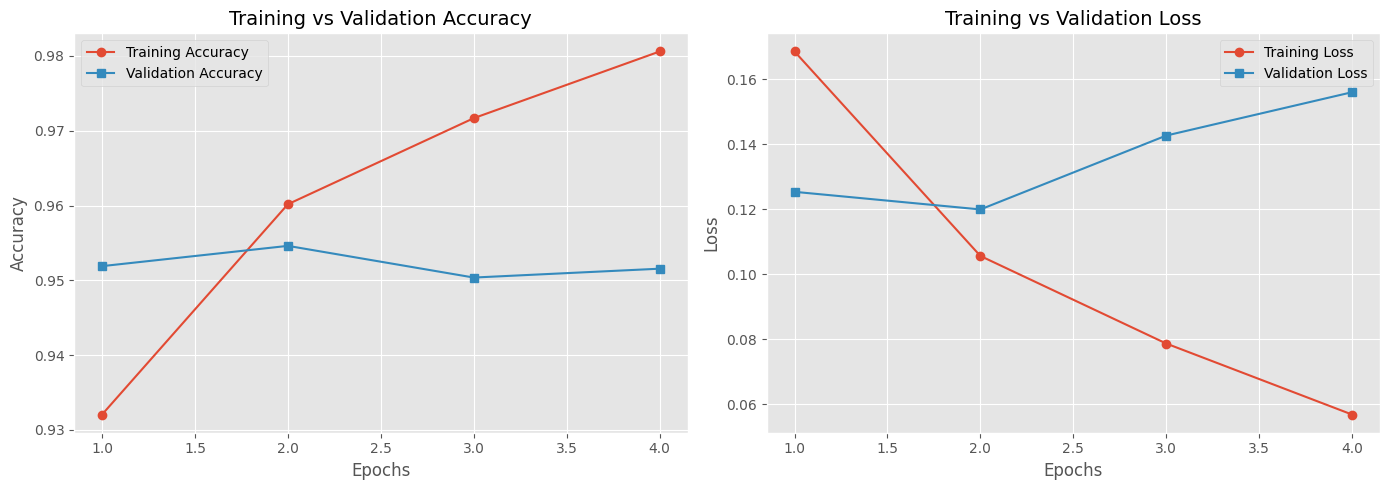

In [ ]:
import matplotlib.pyplot as plt

def plot_expert_text_training_history(history):
    acc = history.history.get('accuracy', [])
    val_acc = history.history.get('val_accuracy', [])
    loss = history.history.get('loss', [])
    val_loss = history.history.get('val_loss', [])
    epochs = range(1, len(acc) + 1)

    plt.style.use('ggplot')  # Clean, built-in style

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Accuracy Plot
    axes[0].plot(epochs, acc, label='Training Accuracy', marker='o')
    if val_acc:
        axes[0].plot(epochs, val_acc, label='Validation Accuracy', marker='s')
    axes[0].set_title('Training vs Validation Accuracy', fontsize=14)
    axes[0].set_xlabel('Epochs', fontsize=12)
    axes[0].set_ylabel('Accuracy', fontsize=12)
    axes[0].legend()
    axes[0].grid(True)

    # Loss Plot
    axes[1].plot(epochs, loss, label='Training Loss', marker='o')
    if val_loss:
        axes[1].plot(epochs, val_loss, label='Validation Loss', marker='s')
    axes[1].set_title('Training vs Validation Loss', fontsize=14)
    axes[1].set_xlabel('Epochs', fontsize=12)
    axes[1].set_ylabel('Loss', fontsize=12)
    axes[1].legend()
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()


plot_expert_text_training_history(history)
